<a href="https://colab.research.google.com/github/devloper64/colab_ai_assignment/blob/main/Ai_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q xlrd
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
import matplotlib as mlp
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, RepeatedKFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score



from google.colab import drive
drive.mount('/content/drive')

data = pd.read_excel('/content/drive/My Drive/gpm.xlsx')
data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Profession,Age,PreferHeight,SkinColor,EduLevel,FamilyStatus,BodyType,AgeLimit,MaritalStatus,PreferProfession,Pious,Gender
0,Students,23.0,5.4,Fair,Universiy,No,Medium,22-25,Unmarried,Students,Yes,Male
1,Students,24.0,5.9,Brown,Universiy,Yes,Medium,25-30,Unmarried,Businessman,Yes,Female
2,Students,22.0,5.3,Fair,Universiy,Yes,Slim,18-22,Unmarried,Students,Yes,Male
3,Students,23.0,5.4,Fair,College,Yes,Slim,18-22,Unmarried,Students,Yes,Male
4,Teacher,27.0,5.1,Fair,College,Yes,Medium,18-22,Unmarried,Students,Yes,Male
...,...,...,...,...,...,...,...,...,...,...,...,...
753,Students,20.0,5.5,Fair,Universiy,Yes,Medium,22-25,Unmarried,NaN,Yes,Male
754,Students,19.0,5.5,Brown,NaN,No,NaN,22-25,Unmarried,Private Job Holder,Yes,Male
755,Students,21.0,5.8,Brown,Universiy,Yes,Medium,22-25,Unmarried,Defense,Yes,Female
756,Students,20.0,5.9,Black,Universiy,Yes,Medium,25-30,Unmarried,Businessman,Yes,Female


In [ ]:
data.Gender[data.Gender == 'Male'] = 1
data.Gender[data.Gender == 'Female'] = 2
data

<ipython-input-186-1f9f8d6f31a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Gender[data.Gender == 'Male'] = 1
<ipython-input-186-1f9f8d6f31a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Gender[data.Gender == 'Female'] = 2


,Profession,Age,PreferHeight,SkinColor,EduLevel,FamilyStatus,BodyType,AgeLimit,MaritalStatus,PreferProfession,Pious,Gender
0,Students,23.0,5.4,Fair,Universiy,No,Medium,22-25,Unmarried,Students,Yes,1
1,Students,24.0,5.9,Brown,Universiy,Yes,Medium,25-30,Unmarried,Businessman,Yes,2
2,Students,22.0,5.3,Fair,Universiy,Yes,Slim,18-22,Unmarried,Students,Yes,1
3,Students,23.0,5.4,Fair,College,Yes,Slim,18-22,Unmarried,Students,Yes,1
4,Teacher,27.0,5.1,Fair,College,Yes,Medium,18-22,Unmarried,Students,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...
753,Students,20.0,5.5,Fair,Universiy,Yes,Medium,22-25,Unmarried,NaN,Yes,1
754,Students,19.0,5.5,Brown,NaN,No,NaN,22-25,Unmarried,Private Job Holder,Yes,1
755,Students,21.0,5.8,Brown,Universiy,Yes,Medium,22-25,Unmarried,Defense,Yes,2
756,Students,20.0,5.9,Black,Universiy,Yes,Medium,25-30,Unmarried,Businessman,Yes,2


<Axes: xlabel='Gender', ylabel='count'>

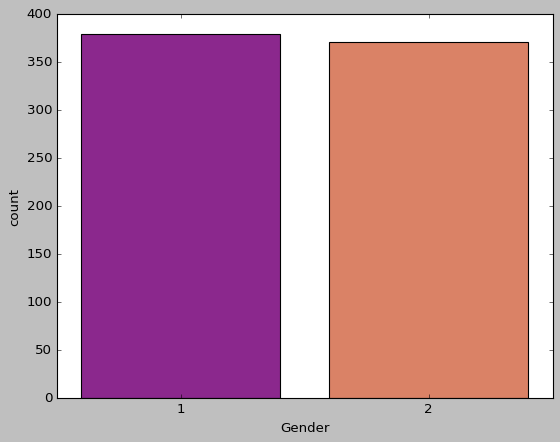

In [ ]:
sns.countplot(x='Gender',data = data,palette ='plasma')

In [ ]:
male_data=data.Gender[data.Gender == 1]
male_data.size

379

In [ ]:
female_data=data.Gender[data.Gender == 2]
female_data.size

371

In [ ]:
data=data.rename(columns = {'EduLevel':'EducationLevel'})
data=data.rename(columns = {'AgeLimit':'AgeGroup'})
data

,Profession,Age,PreferHeight,SkinColor,EducationLevel,FamilyStatus,BodyType,AgeGroup,MaritalStatus,PreferProfession,Pious,Gender
0,10,23.0,5.4,2,Universiy,No,Medium,22-25,Unmarried,Students,Yes,Male
1,10,24.0,5.9,1,Universiy,Yes,Medium,25-30,Unmarried,Businessman,Yes,Female
2,10,22.0,5.3,2,Universiy,Yes,Slim,18-22,Unmarried,Students,Yes,Male
3,10,23.0,5.4,2,College,Yes,Slim,18-22,Unmarried,Students,Yes,Male
4,11,27.0,5.1,2,College,Yes,Medium,18-22,Unmarried,Students,Yes,Male
...,...,...,...,...,...,...,...,...,...,...,...,...
753,10,20.0,5.5,2,Universiy,Yes,Medium,22-25,Unmarried,NaN,Yes,Male
754,10,19.0,5.5,1,NaN,No,NaN,22-25,Unmarried,Private Job Holder,Yes,Male
755,10,21.0,5.8,1,Universiy,Yes,Medium,22-25,Unmarried,Defense,Yes,Female
756,10,20.0,5.9,0,Universiy,Yes,Medium,25-30,Unmarried,Businessman,Yes,Female


<ipython-input-140-c72a2005487d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True)


<Axes: >

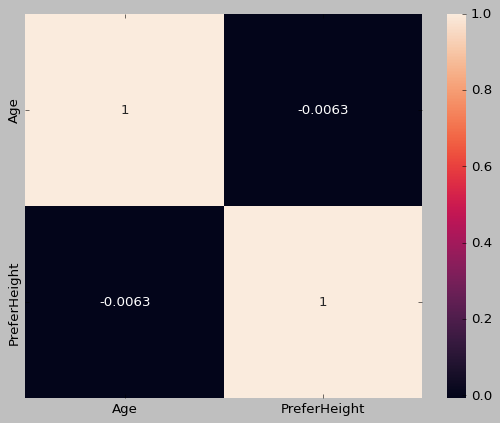

In [ ]:
plt.figure(figsize = (8,6))
sns.heatmap(data.corr(), annot = True)

In [ ]:
le = LabelEncoder()
data['Profession'] = le.fit_transform(data['Profession'])
data['SkinColor'] = le.fit_transform(data['SkinColor'])
data['EducationLevel'] = le.fit_transform(data['EducationLevel'])
data['FamilyStatus'] = le.fit_transform(data['FamilyStatus'])
data['BodyType'] = le.fit_transform(data['BodyType'])
data['AgeGroup'] = le.fit_transform(data['AgeGroup'])
data['MaritalStatus'] = le.fit_transform(data['MaritalStatus'])
data['PreferProfession'] = le.fit_transform(data['PreferProfession'])
data['Pious'] = le.fit_transform(data['Pious'])
data['Gender'] = le.fit_transform(data['Gender'])
data['Age'] = le.fit_transform(data['Age'])
data['PreferHeight'] = le.fit_transform(data['PreferHeight'])



<Axes: >

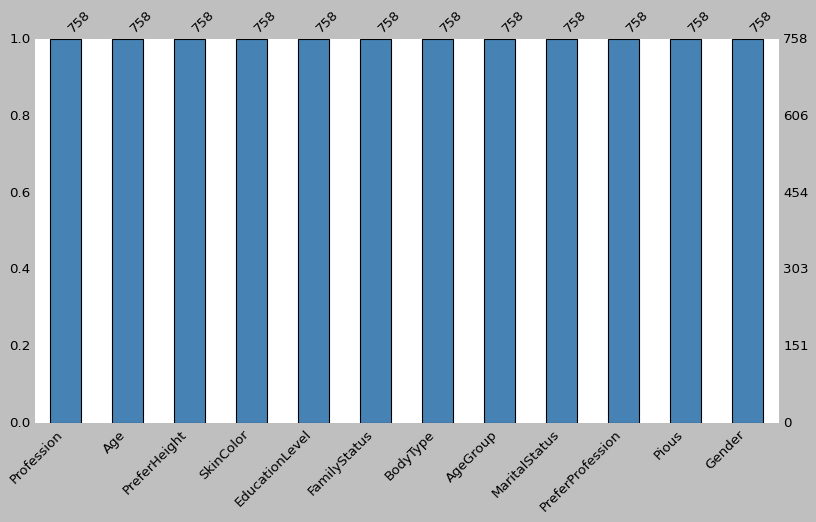

In [ ]:
msno.bar(data, figsize=(12, 6), fontsize=12, color='steelblue')

<Axes: >

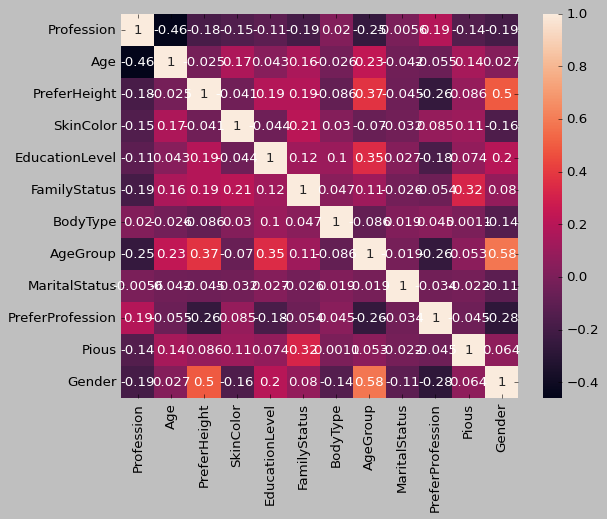

In [ ]:
plt.figure(figsize = (8,6))
sns.heatmap(data.corr(), annot = True)

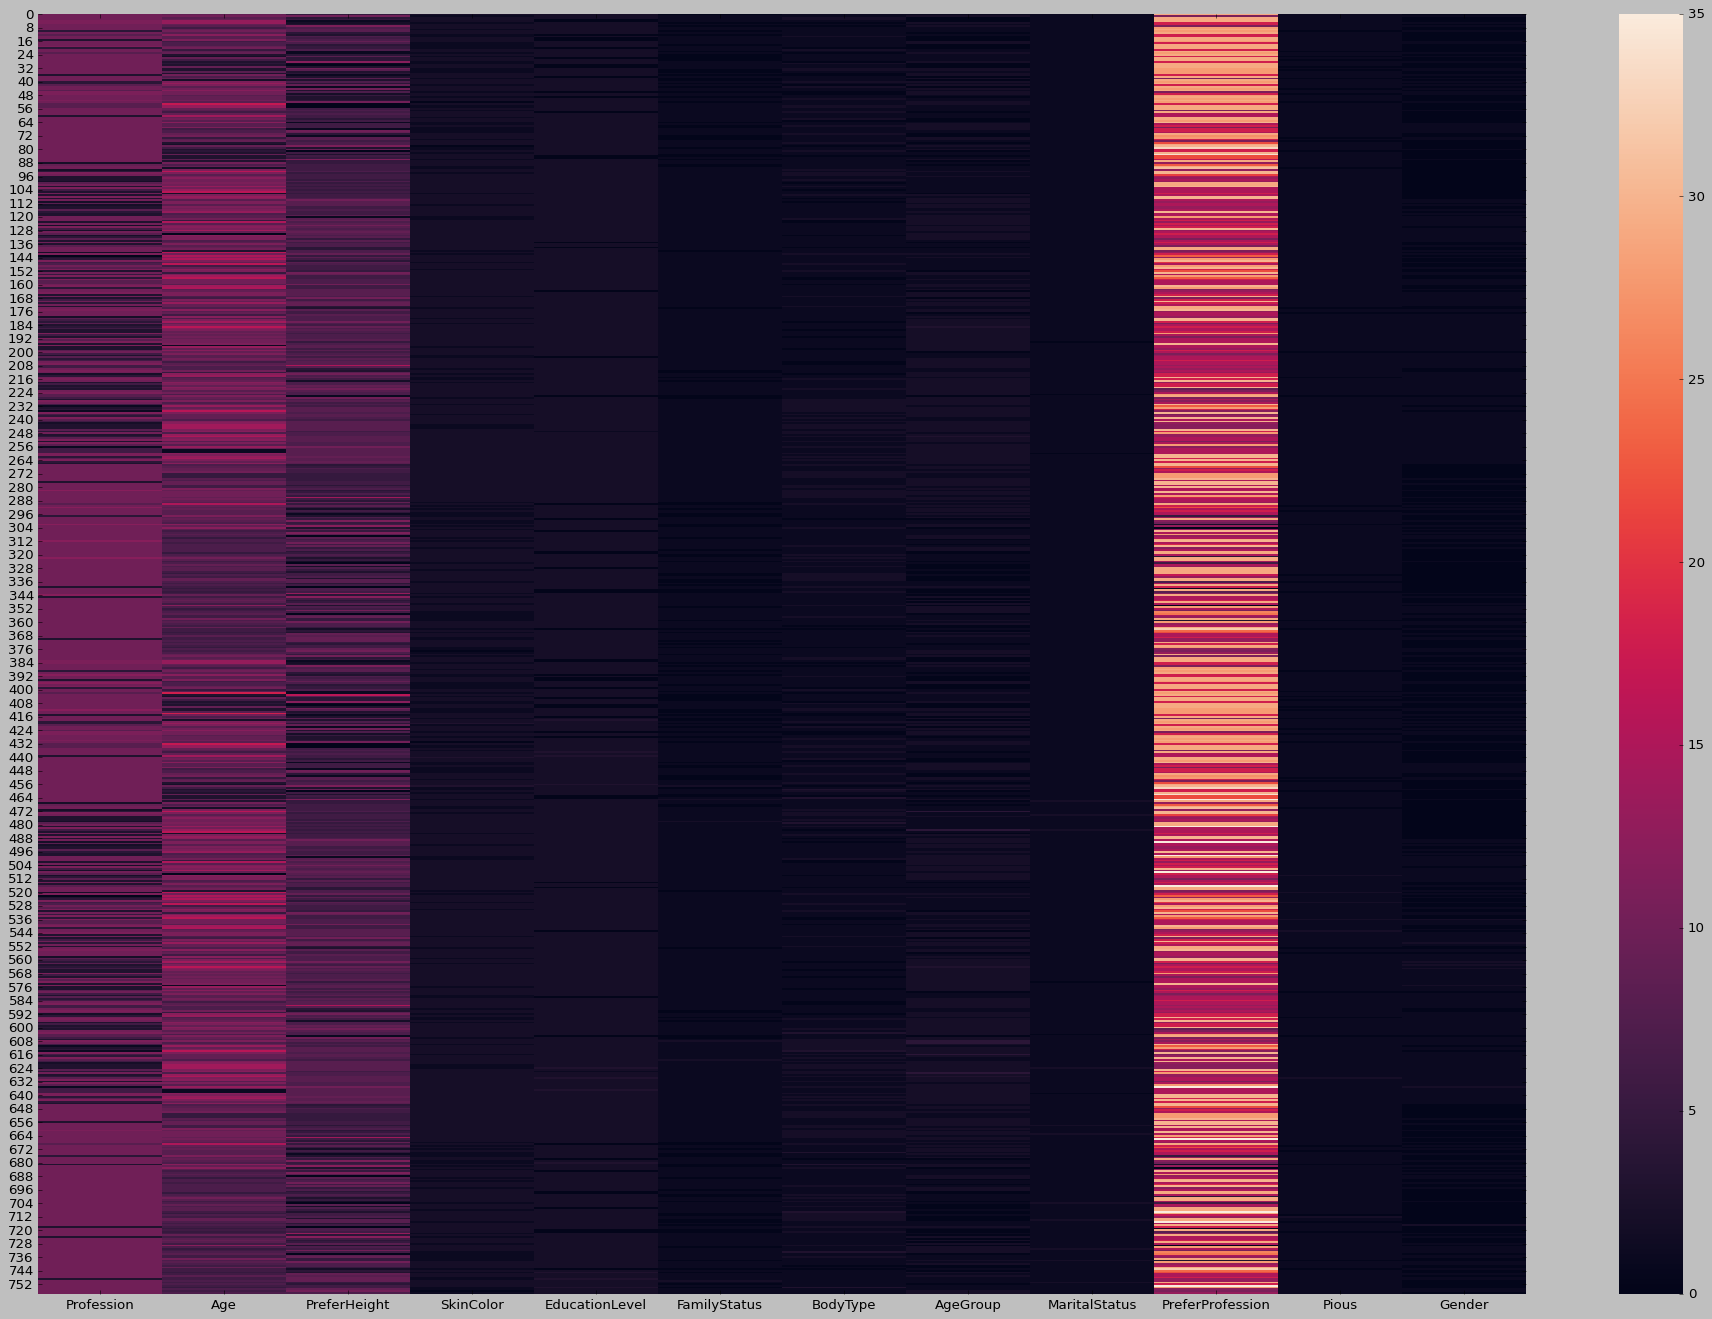

In [ ]:
plt.figure(figsize=(30,20))
sns.heatmap(data)
plt.show()

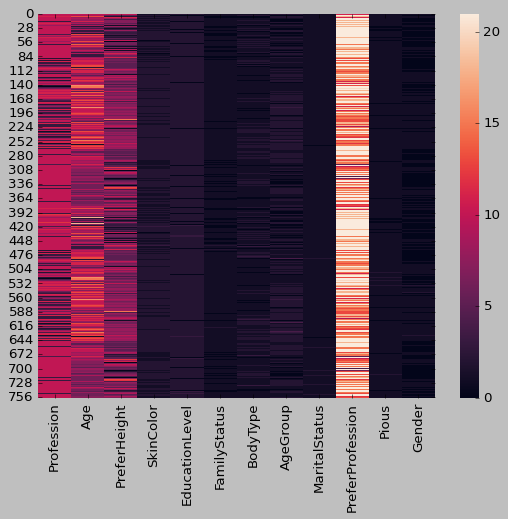

In [ ]:
sns.heatmap(data, vmin =0, vmax= 21)
plt.show()

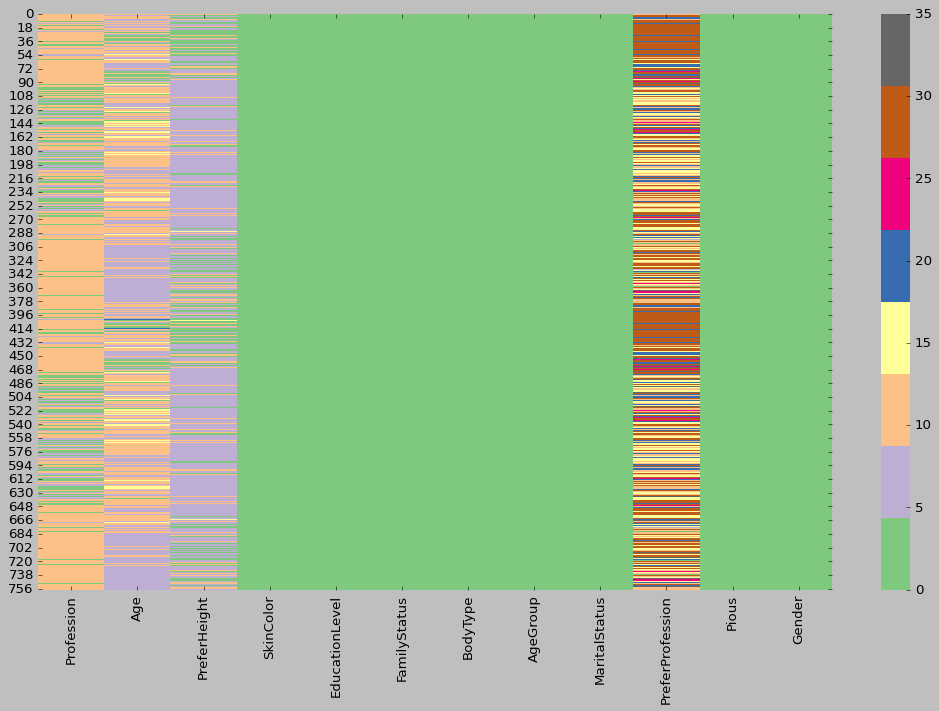

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(data, cmap= 'Accent')
plt.show()

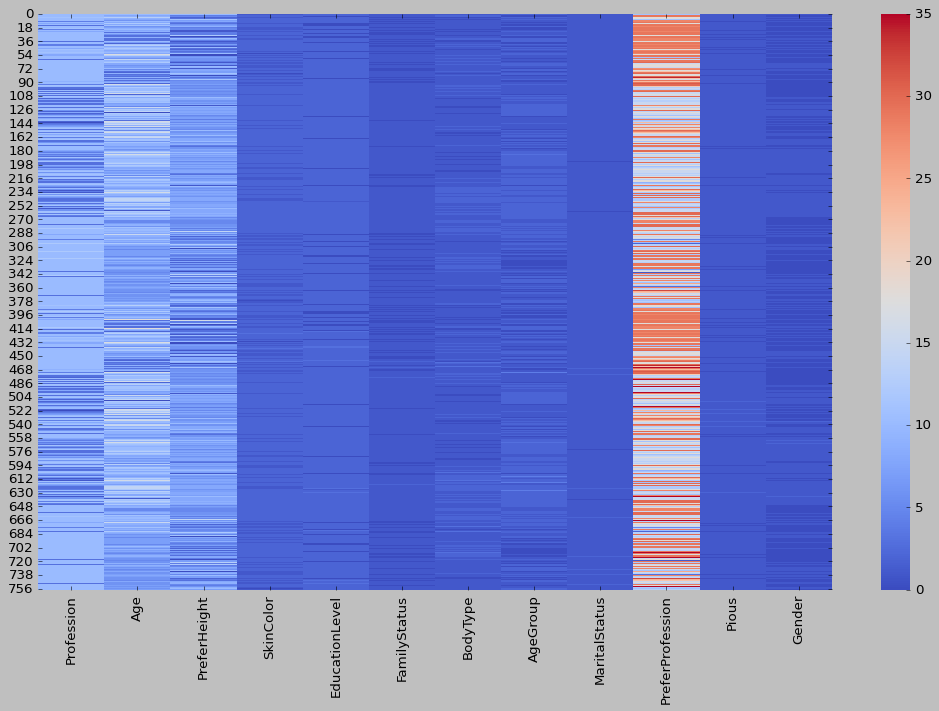

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(data, cmap= 'coolwarm')
plt.show()

<ipython-input-148-08b07587930e>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),


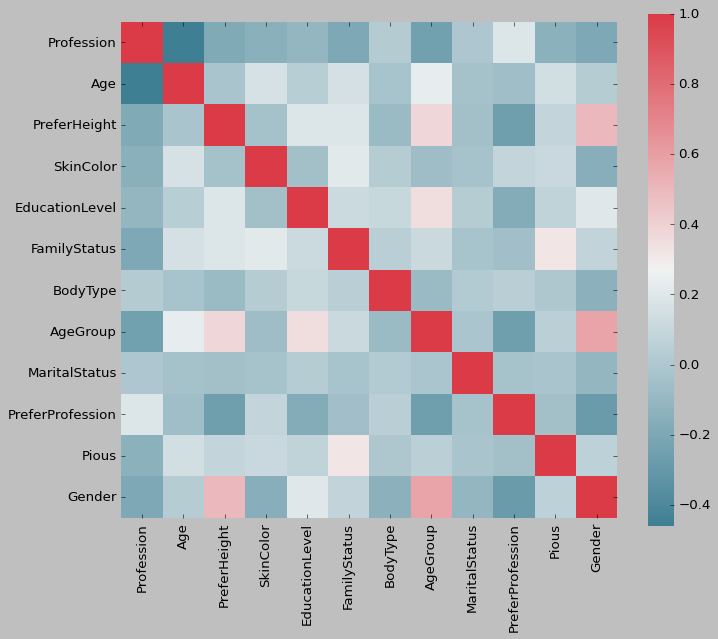

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Profession        758 non-null    int64
 1   Age               758 non-null    int64
 2   PreferHeight      758 non-null    int64
 3   SkinColor         758 non-null    int64
 4   EducationLevel    758 non-null    int64
 5   FamilyStatus      758 non-null    int64
 6   BodyType          758 non-null    int64
 7   AgeGroup          758 non-null    int64
 8   MaritalStatus     758 non-null    int64
 9   PreferProfession  758 non-null    int64
 10  Pious             758 non-null    int64
 11  Gender            758 non-null    int64
dtypes: int64(12)
memory usage: 71.2 KB


In [ ]:
X = data[['Profession', 'SkinColor', 'EducationLevel', 'FamilyStatus', 'BodyType', 'AgeGroup', 'MaritalStatus','PreferProfession', 'Pious']]
y = data['Gender']

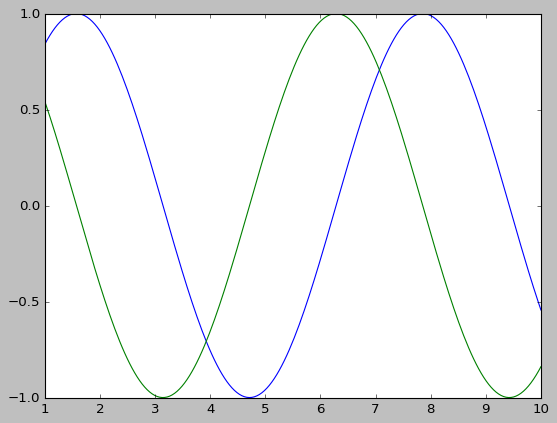

In [ ]:
plt.style.use('classic')

data = np.linspace(1,10,200)
plt.plot(data,np.sin(data))
plt.plot(data,np.cos(data))
plt.show() 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
classifier_lin = LinearRegression()
classifier_lin.fit(X_train, y_train)

LinearRegression()

In [ ]:
classifier_lin.score(X_train, y_train)

0.3940067842197711

In [ ]:
classifier_lin.score(X_test, y_test)

0.36347362680933293

In [ ]:
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(X_train)
xtest = sc_x.transform(X_test)

In [ ]:
classifier_loc = LogisticRegression(random_state = 0)
classifier_loc.fit(xtrain, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred_loc = classifier_loc.predict(xtest)
acurency_loc=accuracy_score(y_test, y_pred_loc)
acurency_loc

0.7960526315789473

In [ ]:
classifier_dtc = DecisionTreeClassifier(random_state = 0)
classifier_dtc.fit(xtrain, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
y_pred_dtc = classifier_dtc.predict(xtest)
acurency_dtc=accuracy_score(y_test, y_pred_dtc)
acurency_dtc

0.8552631578947368

In [ ]:
classifier_svc = SVC()
classifier_svc.fit(xtrain, y_train)

SVC()

In [ ]:
y_pred_svc = classifier_svc.predict(xtest)
acurency_svc=accuracy_score(y_test, y_pred_svc)
acurency_svc

0.7960526315789473

In [ ]:
classifier_rf = RandomForestClassifier(n_estimators=100,random_state=0)
classifier_rf.fit(xtrain, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_pred_rf = classifier_rf.predict(xtest)
acurency_rf=accuracy_score(y_test, y_pred_rf)
acurency_rf

0.8618421052631579

In [ ]:
conf_matrix = confusion_matrix(y_pred_rf,y_test)
print(conf_matrix)

[[66  5  0]
 [15 65  1]
 [ 0  0  0]]


In [ ]:
tp = conf_matrix[0,0]
fp = conf_matrix[1,0]
fn = conf_matrix[0,1]

precision  = tp / (tp + fp)
recall     = tp / (tp + fn)
f1_score   = 2*( precision * recall)/(precision + recall)

print('precision, recall and f1-score for label 0')
print('The precision for label 0 is: {0:.2f}'.format(precision))
print('The recall for label 0 is: {0:.2f}'.format(recall))
print('The f1-score for label 0 is: {0:.2f}'.format(f1_score))
print('\n')

#For Label 1 

tp = conf_matrix[1,1]
fp = conf_matrix[0,1]
fn = conf_matrix[1,0]

precision  = tp / (tp + fp)
recall     = tp / (tp + fn)
f1_score   = 2*( precision * recall)/(precision + recall)

print('precision, recall and f1-score for label 1')
print('The precision for label 1 is: {0:.2f}'.format(precision))
print('The recall for label 1 is: {0:.2f}'.format(recall))
print('The f1-score for label 1 is: {0:.2f}'.format(f1_score))

precision, recall and f1-score for label 0
The precision for label 0 is: 0.81
The recall for label 0 is: 0.93
The f1-score for label 0 is: 0.87


precision, recall and f1-score for label 1
The precision for label 1 is: 0.93
The recall for label 1 is: 0.81
The f1-score for label 1 is: 0.87


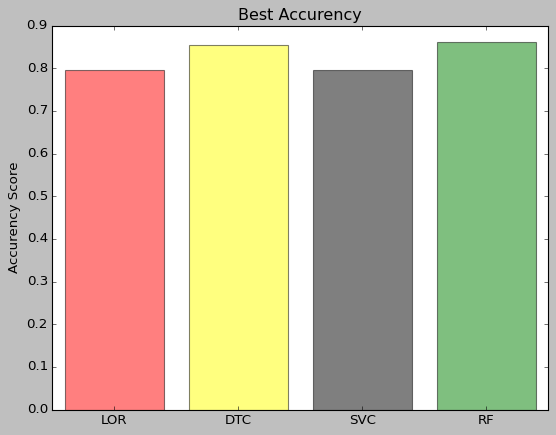

In [ ]:
objects=("LOR","DTC","SVC","RF")
y_pos=np.arange(len(objects))
performance=[acurency_loc,acurency_dtc,acurency_svc,acurency_rf]
plt.bar(y_pos,performance,align='center',alpha=0.5,color=['red','yellow','black','green'])
plt.xticks(y_pos,objects)
plt.ylabel('Accurency Score')
plt.title('Best Accurency')
plt.show()